# MAC0460 - Intruduction to machine learning
<hr>

## EP5: Neural networks and scikit-learn

### Topics / concepts explored in this EP:



### Part 1: Data preparation

The next three code cells will deal with the preparation of the dataset used

#### 1.1 MNIST dataset 

This is a well known dataset, commonly used as a first example of image classification tasks. We could say it is the "Hello world!" of image classification. It consists of handwritten digits, divided into $60000$ training images and $10000$ test images. All images are gray-scale (one channel with pixel intensities varying from 0 to 255) and have size $28 \times 28$. There are 10 classes, corresponding to digits 0 to 9.

The dataset is available in many places. Here we will use the one available with Keras.

In [8]:

from tensorflow.keras.datasets import mnist

# extracting training and test parts of the dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = mnist.load_data()

#### 1.3 Separating reduced training set

Here we are going to create a new trianing set, consisting of $n\_samples = 2000$ examples of each class

In [9]:
import numpy as np
from sklearn.utils import shuffle

np.random.seed(666)

# number of samples from each class to be inserted in the reduced set
# SHOULD FIND A MORE BEATIFUL WAY TO DO THIS
n_sample = 2000
x_train_reduced = y_train_reduced = None
for c in range(10):
    itens = [i for i in range(len(x_train_all)) if y_train_all[i] == c]
    x_tmp, y_tmp = shuffle(x_train_all[itens], y_train_all[itens])
    if x_train_reduced is None:
        x_train_reduced, y_train_reduced = x_tmp[:n_sample], y_tmp[:n_sample]
        continue
    x_train_reduced = np.concatenate([x_train_reduced, x_tmp[:n_sample]], axis = 0) 
    y_train_reduced = np.concatenate([y_train_reduced, y_tmp[:n_sample]])


#### 1.2 Extracting features

In our Neural network we are going to use the mean intersity of the pixels of the image. This value is going to be transformed to fit the $[0,1]$ interval. 

x_train --- dtype:float32 | shape:(20000,) | min:0.0 | max:1.0
y_train --- dtype:float32 | shape:(20000,) | min:0.0 | max:9.0
x_test --- dtype:float32 | shape:(10000,) | min:0.0 | max:1.0
y_test --- dtype:float32 | shape:(10000,) | min:0.0 | max:9.0


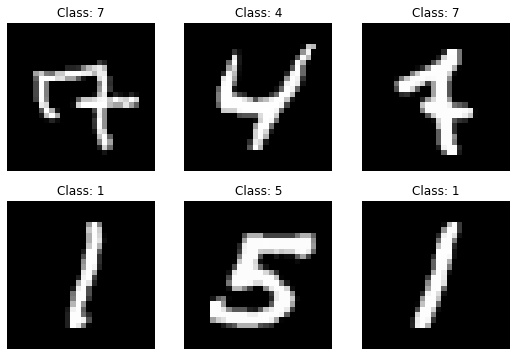

In [12]:
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

# image features of mean intensity without normalization
x_train_features = np.array([np.mean(image) for image in x_train_reduced])
x_test_features = np.array([np.mean(image) for image in x_test_all])

# image features with normalization in [0,1]
x_train_features = minmax_scale(x_train_features)
x_test_features = minmax_scale(x_test_features)

# shuflling training set and setting corrects data types
x_train, y_train, x_image = shuffle(x_train_features.astype('float32'), y_train_reduced.astype('float32'), x_train_reduced)
x_test, y_test = x_test_features.astype('float32'), y_test_all.astype('float32')

def print_info(label, x):
    print(label + " --- dtype:" + str(x.dtype) + " | shape:" + str(x.shape) + " | min:" + str(min(x)) + " | max:" + str(max(x)))

print_info("x_train", x_train)
print_info("y_train", y_train)
print_info("x_test", x_test)
print_info("y_test", y_test)

# printing 6 images of the training set
fig, ax = plt.subplots(2, 3, figsize = (9, 6))
rl = np.random.choice(len(x_train), 6)
for i, j in zip(range(6), rl):
    ax[i//3, i%3].imshow(x_image[j], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train[j])
plt.show()